In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 18
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None), xticks=None):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    if xticks is None:
        plt.xticks(fontsize = font['size'], fontname = "serif")
    else:
        plt.xticks(xticks, fontsize = font['size'], fontname = "serif")
    plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.tick_params(direction="in")
    
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

In [2]:

fes_magn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch100_sample1/FES-magn-MC.dat", skiprows=1).T
fes_magn_d = np.loadtxt("../dirichlet-flow-matching/logs-dir-ising/latt4x4T4.0/kernel9x9/val_baseline/epoch201_sample1//FES-magn.dat", skiprows=1).T

fes_magn_g = np.loadtxt("../dirichlet-flow-matching/logs-gaussian-ising/latt4x4T4.0/kernel9x9/val_baseline/epoch203//FES-magn.dat", skiprows=1).T
fes_magn_gc = np.loadtxt("../dirichlet-flow-matching/logs-gaussian-ising/latt4x4T4.0/kernel9x9_celoss/val_baseline/epoch201_sample1//FES-magn.dat", skiprows=1).T


In [3]:
err_fes_magn_gc = fes_magn_gc[1]-fes_magn_ref[1]
print(err_fes_magn_gc)
mse_fes_magn_gc = np.sum((fes_magn_gc[1]-fes_magn_ref[1])**2)/fes_magn_gc.shape[1]
print(mse_fes_magn_gc)

err_fes_magn_g = fes_magn_g[1]-fes_magn_ref[1]
print(err_fes_magn_g)
mse_fes_magn_g= np.sum((fes_magn_g[1]-fes_magn_ref[1])**2)/fes_magn_g.shape[1]
print(mse_fes_magn_g)


err_fes_magn_d = fes_magn_d[1]-fes_magn_ref[1]
print(err_fes_magn_d)
mse_fes_magn_d= np.sum((fes_magn_d[1]-fes_magn_ref[1])**2)/fes_magn_d.shape[1]
print(mse_fes_magn_d)

[-0.492526 -0.153005  0.1543    0.188476  0.168605  0.001858  0.025307
 -0.139172 -0.107182 -0.147686 -0.00418   0.003232  0.189634  0.163251
  0.098847 -0.151372 -0.492377]
0.04381310530129411
[ 0.482325  0.501275  0.404339  0.135538  0.108108  0.023959 -0.143856
 -0.175423 -0.208653 -0.21391  -0.170887 -0.185464 -0.112277  0.155807
  0.294848  0.34723   0.348048]
0.07340705620500006
[ 1.522853  0.850467  0.343438  0.05742  -0.077641 -0.097311 -0.061317
 -0.129692 -0.15538  -0.208195 -0.281913 -0.347622 -0.324432  0.125115
  0.262404  0.860614  1.880895]
0.4668053964035884


(2, 17)


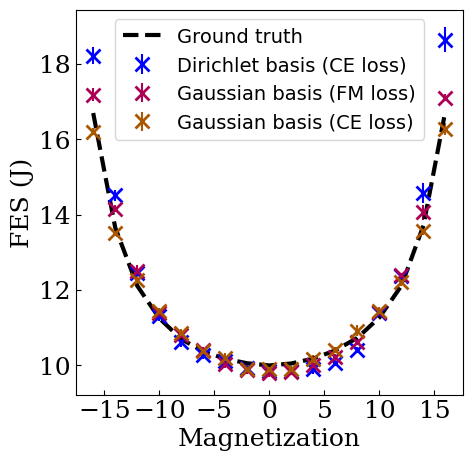

In [4]:
print(fes_magn_ref.shape)
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_magn_d[0], fes_magn_d[1], yerr=fes_magn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_magn_g[0], fes_magn_g[1], yerr=fes_magn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_magn_gc[0], fes_magn_gc[1], yerr=fes_magn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_magn_ref[0], fes_magn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=3)
plt.legend(fontsize=font["size"]-4)
setfigform_simple("Magnetization", "FES (J)")


In [5]:
# Time embedding
fes_sqrmagn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch200_sample1/FES-sqrmagn-MC.dat", skiprows=1).T
fes_sqrmagn_d = np.loadtxt("../dirichlet-flow-matching/logs-dir-ising/latt4x4T4.0/kernel9x9/val_baseline/epoch201_sample1//FES-sqrmagn.dat", skiprows=1).T
# Time embedding
fes_sqrmagn_g = np.loadtxt("../dirichlet-flow-matching/logs-gaussian-ising/latt4x4T4.0/kernel9x9/val_baseline/epoch203//FES-sqrmagn.dat", skiprows=1).T
fes_sqrmagn_gc = np.loadtxt("../dirichlet-flow-matching/logs-gaussian-ising/latt4x4T4.0/kernel9x9_celoss/val_baseline/epoch201_sample1/FES-sqrmagn.dat", skiprows=1).T


In [6]:

err_fes_sqrmagn_gc = fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_gc)
mse_fes_sqrmagn_gc = np.sum((fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1])**2)/fes_sqrmagn_d.shape[1]
print(mse_fes_sqrmagn_gc/(16*16))

err_fes_sqrmagn_g = fes_sqrmagn_g[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_g)
mse_fes_sqrmagn_g = np.sum((fes_sqrmagn_g[1]-fes_sqrmagn_ref[1])**2)/fes_sqrmagn_d.shape[1]
print(mse_fes_sqrmagn_g/(16*16))

err_fes_sqrmagn_d = fes_sqrmagn_d[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_d)
mse_fes_sqrmagn_d = np.sum((fes_sqrmagn_d[1]-fes_sqrmagn_ref[1])**2)/fes_sqrmagn_d.shape[1]
print(mse_fes_sqrmagn_d/(16*16))

[12.008742 21.807583 18.539099 10.003778  3.920777  0.201956 -1.743959
 -2.037876]
0.530352508214971
[ 6.546911 10.706817  6.196676  0.879712 -1.862448 -3.403146 -3.30632
 -2.640334]
0.1121210407174347
[-6.008723 -6.017101 -7.074978 -6.886026 -5.969013 -5.553537 -3.907216
 -2.673391]
0.12630232911238518


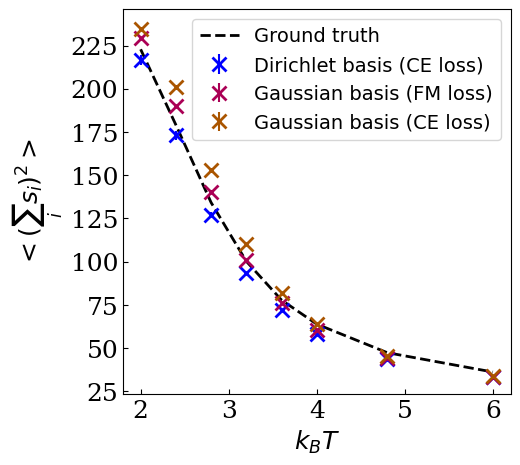

In [7]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_sqrmagn_d[0], fes_sqrmagn_d[1], yerr=fes_sqrmagn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_sqrmagn_g[0], fes_sqrmagn_g[1], yerr=fes_sqrmagn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_sqrmagn_gc[0], fes_sqrmagn_gc[1], yerr=fes_sqrmagn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_sqrmagn_ref[0], fes_sqrmagn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(fontsize=font["size"]-4)
setfigform_simple("$k_BT$", "$<(\sum_i s_i)^2>$", xticks=np.arange(2.0, 6.4, 1.0))

In [9]:
# Time embedding
fes_ssf_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch200_sample1/FES-ssf-MC.dat", skiprows=1).T
fes_ssf_d = np.loadtxt("../dirichlet-flow-matching/logs-dir-ising/latt4x4T4.0/kernel9x9/val_baseline/epoch201_sample1//FES-ssf.dat", skiprows=1).T
# Time embedding
fes_ssf_g = np.loadtxt("../dirichlet-flow-matching/logs-gaussian-ising/latt4x4T4.0/kernel9x9/val_baseline/epoch203//FES-ssf.dat", skiprows=1).T
fes_ssf_gc = np.loadtxt("../dirichlet-flow-matching/logs-gaussian-ising/latt4x4T4.0/kernel9x9_celoss/val_baseline/epoch201_sample1/FES-ssf.dat", skiprows=1).T


In [10]:

print(fes_ssf_gc[0])
err_fes_ssf_gc = fes_ssf_gc[1]-fes_ssf_ref[1]
print(err_fes_ssf_gc)
mse_fes_ssf_gc = np.sum((fes_ssf_gc[1]-fes_ssf_ref[1])**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_gc)

print(fes_ssf_g[0])
err_fes_ssf_g= fes_ssf_g[1]-fes_ssf_ref[1]
print(err_fes_ssf_g)
mse_fes_ssf_g= np.sum((fes_ssf_g[1]-fes_ssf_ref[1])**2)/fes_ssf_g.shape[1]
print(mse_fes_ssf_g)

print(fes_ssf_d[0])
err_fes_ssf_d = fes_ssf_d[1]-fes_ssf_ref[1]
print(err_fes_ssf_d)
mse_fes_ssf_d = np.sum((fes_ssf_d[1]-fes_ssf_ref[1])**2)/fes_ssf_g.shape[1]
print(mse_fes_ssf_d)

[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[ 0.000944  0.07885   0.134667  0.110636  0.055543  0.019901 -0.008189
 -0.008907]
0.005027651005125005
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[-0.014205  0.002023  0.017533  0.009361 -0.003078 -0.00977  -0.012719
 -0.009618]
0.00012001435412500014
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[-0.022805 -0.016678 -0.016419 -0.024392 -0.026592 -0.024134 -0.016079
 -0.010806]
0.000415958153874999


In [ ]:
idx_order_ref = np.argsort(fes_ssf_ref[0])

In [ ]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_ssf_d[0], fes_ssf_d[1], yerr=fes_ssf_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_ssf_g[0], fes_ssf_g[1], yerr=fes_ssf_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_ssf_gc[0], fes_ssf_gc[1], yerr=fes_ssf_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_ssf_ref[0][idx_order_ref], fes_ssf_ref[1][idx_order_ref], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font["size"]-2)
setfigform_simple("$k_BT$", "$<\sum_{ij} s_i*s_j>/(16*16)$", xticks=np.arange(2.0, 6.4, 1.0))

# 6x6 lattice

In [ ]:
# Time embedding
fes_magn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-magn-MC.dat", skiprows=1).T
fes_magn_d = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-magn.dat", skiprows=1).T

# Time embedding
fes_magn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-magn.dat", skiprows=1).T
fes_magn_gc = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-magn.dat", skiprows=1).T


In [ ]:
print(fes_magn_d[0])
print(fes_magn_ref[0])


err_fes_magn_gc = fes_magn_gc[1]-fes_magn_ref[1]
print(err_fes_magn_gc)
mse_fes_magn_gc = np.sum(((fes_magn_gc[1]-fes_magn_ref[1]))**2)/fes_magn_d.shape[1]
print(mse_fes_magn_gc)


err_fes_magn_g = fes_magn_g[1]-fes_magn_ref[1]
print(err_fes_magn_g)
mse_fes_magn_g = np.sum(((fes_magn_g[1]-fes_magn_ref[1]))**2)/fes_magn_d.shape[1]
print(mse_fes_magn_g)

err_fes_magn_d = fes_magn_d[1]-fes_magn_ref[1]
print(err_fes_magn_d)
mse_fes_magn_d = np.sum(((fes_magn_d[1]-fes_magn_ref[1]))**2)/fes_magn_d.shape[1]
print(mse_fes_magn_d)

In [ ]:
print(fes_magn_ref.shape)
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_magn_d[0], fes_magn_d[1], yerr=fes_magn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_magn_g[0], fes_magn_g[1], yerr=fes_magn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_magn_gc[0], fes_magn_gc[1], yerr=fes_magn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_magn_ref[0], fes_magn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=3)
plt.legend(fontsize=font["size"]-4)
setfigform_simple("Magnetization", "FES (J)")


In [ ]:
# Time embedding
fes_sqrmagn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-sqrmagn-MC.dat", skiprows=1).T
fes_sqrmagn_d = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-sqrmagn.dat", skiprows=1).T

# Time embedding
fes_sqrmagn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-sqrmagn.dat", skiprows=1).T
fes_sqrmagn_gc = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-sqrmagn.dat", skiprows=1).T

In [ ]:
print(fes_sqrmagn_d[0])
print(fes_sqrmagn_ref[0])
err_fes_sqrmagn_gc = fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_gc)
mse_fes_sqrmagn_gc = np.sum(((fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1]))**2)/fes_sqrmagn_gc.shape[1]
print(mse_fes_sqrmagn_gc/(36*36))

err_fes_sqrmagn_g = fes_sqrmagn_g[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_g)
mse_fes_sqrmagn_g = np.sum(((fes_sqrmagn_g[1]-fes_sqrmagn_ref[1]))**2)/fes_sqrmagn_gc.shape[1]
print(mse_fes_sqrmagn_g/(36*36))

err_fes_sqrmagn_d = fes_sqrmagn_d[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_d)
mse_fes_sqrmagn_d = np.sum(((fes_sqrmagn_d[1]-fes_sqrmagn_ref[1]))**2)/fes_sqrmagn_gc.shape[1]
print(mse_fes_sqrmagn_d/(36*36))

In [ ]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_sqrmagn_d[0], fes_sqrmagn_d[1], yerr=fes_sqrmagn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_sqrmagn_g[0], fes_sqrmagn_g[1], yerr=fes_sqrmagn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_sqrmagn_gc[0], fes_sqrmagn_gc[1], yerr=fes_sqrmagn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_sqrmagn_ref[0], fes_sqrmagn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(fontsize=font["size"]-4)
setfigform_simple("$k_BT$", "$<(\sum_i s_i)^2>$", xticks=np.arange(2.0, 6.4, 1.0))

In [ ]:
# Time embedding
fes_ssf_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-ssf-MC.dat", skiprows=1).T
fes_ssf_d = np.loadtxt(f"logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-ssf.dat", skiprows=1).T
# Time embedding
fes_ssf_g = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-ssf.dat", skiprows=1).T
fes_ssf_gc = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-ssf.dat", skiprows=1).T


In [ ]:
print(fes_ssf_d[0])
print(fes_ssf_ref[0])
err_fes_ssf_gc = fes_ssf_gc[1]-fes_ssf_ref[1]
print(err_fes_ssf_gc)
mse_fes_ssf_gc = np.sum(((fes_ssf_gc[1]-fes_ssf_ref[1]))**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_gc)

err_fes_ssf_g = fes_ssf_g[1]-fes_ssf_ref[1]
print(err_fes_ssf_g)
mse_fes_ssf_g = np.sum(((fes_ssf_g[1]-fes_ssf_ref[1]))**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_g)

err_fes_ssf_d = fes_ssf_d[1]-fes_ssf_ref[1]
print(err_fes_ssf_d)
mse_fes_ssf_d = np.sum(((fes_ssf_d[1]-fes_ssf_ref[1]))**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_d)

In [ ]:
idx_order_ref = np.argsort(fes_ssf_ref[0])

In [ ]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_ssf_d[0], fes_ssf_d[1], yerr=fes_ssf_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_ssf_g[0], fes_ssf_g[1], yerr=fes_ssf_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_ssf_gc[0], fes_ssf_gc[1], yerr=fes_ssf_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_ssf_ref[0][idx_order_ref], fes_ssf_ref[1][idx_order_ref], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font["size"]-2)
setfigform_simple("$k_BT$", "$<\sum_{ij} s_i*s_j>/(36*36)$", xticks=np.arange(2.0, 6.4, 1.0))

In [ ]:
# Time embedding
fes_ssf_d_2 = np.loadtxt(f"logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample1/FES-ssf-B{655360}.dat", skiprows=1).T
# Time embedding
fes_ssf_g_2 = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample1/FES-ssf{655360}.dat", skiprows=1).T
fes_ssf_gc_2 = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch100_sample1/FES-ssf{655360}.dat", skiprows=1).T


In [ ]:
print(fes_ssf_d_2[0])
print(fes_ssf_ref[0])
err_fes_ssf_d_2 = fes_ssf_d_2[1]-fes_ssf_ref[1]
print(err_fes_ssf_d_2)
mse_fes_ssf_d_2 = np.sum(((fes_ssf_d_2[1]-fes_ssf_ref[1]))**2)/fes_ssf_d_2.shape[1]
print(mse_fes_ssf_d_2)

In [ ]:
# Time embedding
fes_ssf_d_3 = np.loadtxt(f"logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample1/FES-ssf-B{52396032}.dat", skiprows=1).T


In [ ]:
print(fes_ssf_d_3[0])
print(fes_ssf_ref[0])
err_fes_ssf_d_3 = fes_ssf_d_3[1]-fes_ssf_ref[1]
print(err_fes_ssf_d_3)
mse_fes_ssf_d_3 = np.sum(((fes_ssf_d_3[1]-fes_ssf_ref[1]))**2)/fes_ssf_d_3.shape[1]
print(mse_fes_ssf_d_3)

In [ ]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_ssf_d[0], fes_ssf_d[1], yerr=fes_ssf_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_ssf_g[0], fes_ssf_g[1], yerr=fes_ssf_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_ssf_gc[0], fes_ssf_gc[1], yerr=fes_ssf_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])


plt.errorbar(fes_ssf_d_2[0], fes_ssf_d_2[1], yerr=fes_ssf_d_2[2], label="Dirichlet basis (CE loss)", marker="o", linestyle="", markersize=5, c=line_color[0])
plt.errorbar(fes_ssf_g_2[0], fes_ssf_g_2[1], yerr=fes_ssf_g_2[2], label="Gaussian basis (FM loss)", marker="o", linestyle="", markersize=5, c=line_color[1])
plt.errorbar(fes_ssf_gc_2[0], fes_ssf_gc_2[1], yerr=fes_ssf_gc_2[2], label="Gaussian basis (CE loss)", marker="o", linestyle="", markersize=5, c=line_color[2])

plt.errorbar(fes_ssf_d_3[0], fes_ssf_d_3[1], yerr=fes_ssf_d_3[2], label="Dirichlet basis (CE loss)", marker="*", linestyle="", markersize=10, c=line_color[0])

plt.plot(fes_ssf_ref[0][idx_order_ref], fes_ssf_ref[1][idx_order_ref], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font["size"]-2)
setfigform_simple("$k_BT$", "$<\sum_{ij} s_i*s_j>/(36*36)$", xticks=np.arange(2.0, 6.4, 1.0))